In [31]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore" , category=DeprecationWarning)

In [2]:
#importing Data set 
train=pd.read_csv('C:/Users/admin/OneDrive/Documents/Data Sciesnce Repository/Machine_Leaning_Projects/Twitte Analysis/Data/train.csv')
test=pd.read_csv('C:/Users/admin/OneDrive/Documents/Data Sciesnce Repository/Machine_Leaning_Projects/Twitte Analysis/Data/test.csv')

In [3]:
#checing train data set
train.head(20)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [4]:
#checking number of records available 
train.shape

(31962, 3)

In [5]:
##checking number of records available 
test.shape

(17197, 2)

In [6]:
#Now Let's check Label distribution of data set.
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

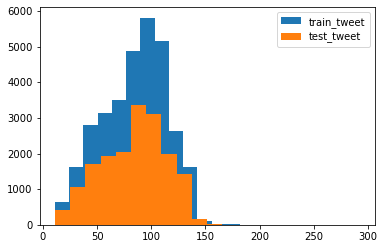

In [7]:
#Now Let's check Lable distribution length

l_train = train['tweet'].str.len()
l_test = test['tweet'].str.len()
plt.hist(l_train, bins=20,label="train_tweet" )
plt.hist(l_test, bins=20,label="test_tweet" )
plt.legend()
plt.show()

In [8]:
#combining train and test dataset
combi = train.append(test, ignore_index=True)
combi.shape

C:\Users\admin\AppData\Local\Temp\ipykernel_5644\3375144518.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combi = train.append(test, ignore_index=True)


(49159, 3)

In [9]:
#Removing unwanted text pattern from tweet
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [10]:
#Removing Twitter Handels from Tweet
combi['normal_tweet'] = np.vectorize(remove_pattern)(combi['tweet'],"@[\w]*")
combi.head()

,id,label,tweet,normal_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [12]:
#Removing Punctuations, Numbers, and Special Characters
combi['normal_tweet'] = combi['normal_tweet'].str.replace("[^a-zA-Z#]", " ")
combi.head(20)

C:\Users\admin\AppData\Local\Temp\ipykernel_5644\553494420.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  combi['normal_tweet'] = combi['normal_tweet'].str.replace("[^a-zA-Z#]", " ")


,id,label,tweet,normal_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


In [15]:
#Removing Short Words
combi['normal_tweet'] = combi['normal_tweet'].apply(lambda x:''.join([w for w in x.split() if len(w)>3]))
combi.head()

,id,label,tweet,normal_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,whenfatherdysfunctionalselfishdragskidsintodys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks#lyftcreditcausetheyofferwheelchairvans#...
2,3,0.0,bihday your majesty,bihdayyourmajesty
3,4,0.0,#model i love u take with u all the time in ...,#modellovetakewithtime
4,5,0.0,factsguide: society now #motivation,factsguidesociety#motivation


In [16]:
#Text Normalization
tokenized_tweet = combi['normal_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [whenfatherdysfunctionalselfishdragskidsintody...
1    [thanks#lyftcreditcausetheyofferwheelchairvans...
2                                  [bihdayyourmajesty]
3                             [#modellovetakewithtime]
4                       [factsguidesociety#motivation]
Name: normal_tweet, dtype: object

In [18]:
from nltk.stem.porter import*
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ''.join(tokenized_tweet[i])
combi['normal_tweet'] = tokenized_tweet

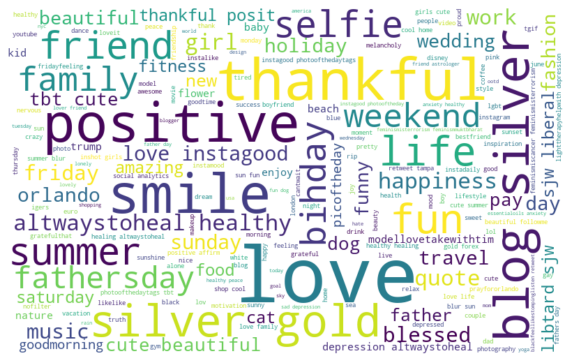

In [34]:
#Now Let's check common words in Tweets
all_words = ''.join([text for text in combi['normal_tweet']]) 
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white',width=800, height = 500, random_state=21, max_font_size =110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


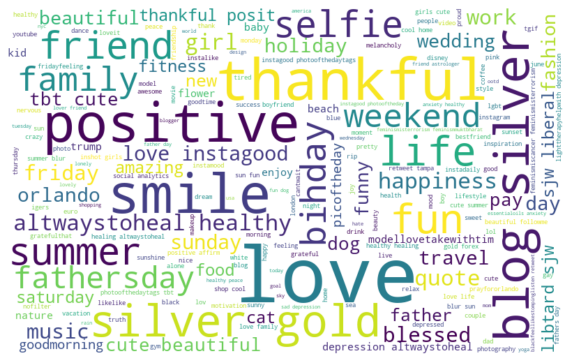

In [35]:
#Let's see Non Racist Words
normal_words = ''.join([text for text in combi['normal_tweet'][combi['label']==0]]) 
wordcloud = WordCloud(background_color='white',width=800, height = 500, random_state=21, max_font_size =110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

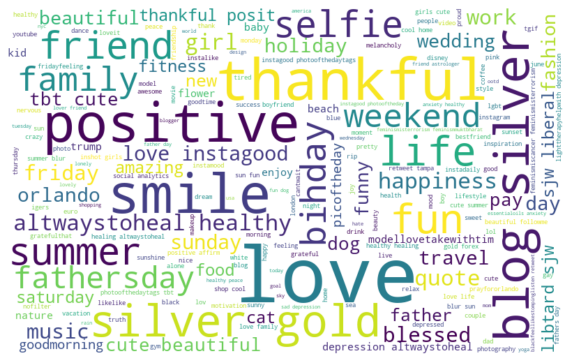

In [37]:
#Let's see Racist Words
negative_words = ''.join([text for text in combi['normal_tweet'][combi['label']==1]]) 
wordcloud = WordCloud(background_color='white',width=800, height = 500, random_state=21, max_font_size =110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()